# __Workshop 5, Advanced AI - Statistics Module__

## __Interpreting coefficients with an example__

### __Data collection and return calculation__

In [6]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAA','MXX']

Visualizing linear relationship

We do a scatter plot including the regression line:

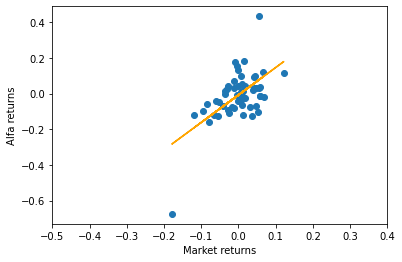

In [7]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!! 
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values 
plt.clf()
x=sr['MXX']
y = sr['ALFAA']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

c:\Users\Oscar\anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


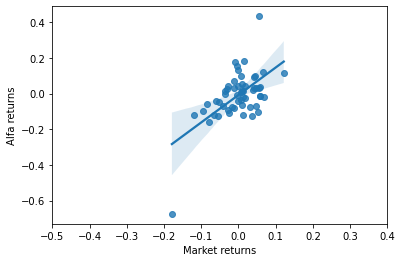

In [8]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()

sns.regplot(x, y)
plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

WHAT DOES THE PLOT TELL YOU? BRIEFLY EXPLAIN

IT TELLS ME THAT THERE IS A POSITIVE RELATION BETWEEN ALFA AND IPC. THAT MEANS, THAT IF IPC INCREASES, I WOULD EXPECT THAT ALFA HAVE AN INCREASE, AS WELL. HOWEVER, I ALSO SEE SOME DOTS FAR AWAY FROM THE REGRESSION LINE, WHICH MEANS THAT SUCH POSITIVE RELATION IS NOT DETERMINISTIC.

IT SEEMS THAT THIS STOCK IS VERY SENSITIVE TO CHANGES IN THE MARKET RETURN SINCE THE SLOPE OF THE LINE SEEMS TO BE HIGHER THAN 1 (HIGHER THAN 45 DEGREES). FOR EACH +1% CHANGE IN THE MARKET RETURN, IT SEEMS THAT THE STOCK RETURNS MOVES MORE THAN +1%. BUT THE SAME WOULD HAPPEN IN NEGATIVE CHANGES; WHEN THE MARKET RETURN LOSES 1% (-1%), THEN THE STOCK RETURN IS EXPECTED TO LOSE MORE THAN 1%! THEN IT SEEMS THAT THE STOCK RETURN IS RISKIER THAN THE MARKET. WE WILL CHECK THIS BY LOOKING AT BETA1 IN THE REGRESSION OUTPUT!

### __Running the regression with the OLS method__

In [9]:
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()
 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.69
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.87e-06
Time:                        20:45:32   Log-Likelihood:                 43.927
No. Observations:                  55   AIC:                            -83.85
Df Residuals:                      53   BIC:                            -79.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0079      0.015     -0.526      0.6

In [10]:
# Another way to run the same model using the ols function (instead of the OLS function):
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()
 
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.69
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.87e-06
Time:                        20:45:53   Log-Likelihood:                 43.927
No. Observations:                  55   AIC:                            -83.85
Df Residuals:                      53   BIC:                            -79.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0079      0.015     -0.526      0.6

In [11]:
# Using matrix algebra to estimate the beta coefficients:
sr['constant'] = 1
selcols = ['constant','MXX']
x = sr[selcols].values
y = sr['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.00786281,  1.53894501])

Writing the regression equation

The regression equation is: E[ALFAret]= -0.00783657539010133 + 1.5392443335106285*MXXret.

### __Interpretation of the regression output__

THE IMPORTANT OUTPUT IS IN THE **COEFFICIENTS TABLE**. THE (intercept) ROW IS THE INFORMATION OF THE BETA0 COEFFICIENT (b0), WHILE THE MXX ROW IS THE INFORMATION ABOUT THE BETA1 COEFFICIENT (b1). THE ESTIMATE COLUMN HAS THE MEAN VALUE FOR b0 AND b1; WE CAN ALSO SEE THE STANDARD ERRORS, t-value AND p-value OF THE b0 AND b1.

__FOR B0, THE HYPOTHESIS TEST IS THE FOLLOWING:__

H0: B0 = 0

Ha: B0 < 0 (IN THIS CASE, B0<0 SINCE B0 IS NEGATIVE IN THE OUTPUT)

IN THIS HYPOTHESIS, THE VARIABLE OF ANALYSIS IS BETA0 (B0).

FOLLOWING THE HYPOTHESIS TEST METHOD, WE CALCULATE THE CORRESPONDING t-value OF THIS HYPOTHESIS AS FOLLOWS:

$$ t=\frac{(B_{0}-0)}{SD(B_{0})} $$

THEN, t = (-0.0078 - 0) / 0.015 = -0.521. THIS VALUE IS AUTOMATICALLY CALCULATED IN THE REGRESSION OUTPUT IN THE COEFFICIENTS TABLE IN THE ROW (intercept).

REMEMBER THAT t-value IS THE DISTANCE BETWEEN THE ESTIMATED BETA VALUE AND ITS HYPOTHETICAL VALUE, WHICH IS ZERO. BUT THIS DISTANCE IS MEASURED IN STANDARD DEVIATIONS OF THE BETA. REMEMBER THAT THE STANDARD ERROR OF THE VARIABLE OF ANALYSIS IS CALLED STANDARD ERROR (IN THIS CASE, THE STD.ERROR OF B0 = 0.015.

SINCE THE ABSOLUTE VALUE OF THE t-value OF B0 IS LESS THAN 2, THEN WE CANNOT REJECT THE NULL HYPOTHESIS. IN OTHER WORDS, WE CAN SAY THAT B0 IS NOT SIGNIFICANTLY LESS THAN ZERO (AT THE 95% CONFIDENCE LEVEL).

<br>

__FOR BETA1 THE HYPOTHESIS TEST IS THE SAME:__

H0: b1 = 0 (THERE IS NO RELATIONSHIP BETWEEN THE MARKET AND THE STOCK RETURN)

Ha: b1 > 0 (THERE IS A POSITIVE RELATIONSHIP BETWEEN THE THE MARKET AND THE STOCK RETURN)

IN THIS HYPOTHESIS, THE VARIABLE OF ANALYSIS IS BETA1 (b1).

FOLLOWING THE HYPOTHESIS TEST METHOD, WE CALCULATE THE CORRESPONDING t-value OF THIS HYPOTHESIS AS FOLLOWS:

$$ t=\frac{(B_{1}-0)}{SD(B_{1})} $$

THEN, t = (1.539 - 0) / 0.287 = 5.36. THIS VALUE IS AUTOMATICALLY CALCULATED IN THE REGRESSION OUTPUT IN THE COEFFICIENTS TABLE IN THE SECOND ROW OF THE COEFFICIENT TABLE.

REMEMBER THAT t-value IS THE DISTANCE BETWEEN THE ESTIMATED VALUE OF THE BETA AND ITS HYPOTHETICAL VALUE, WHICH IS ZERO. BUT THIS DISTANCE IS MEASURED IN STANDARD DEVIATIONS OF THE BETA. REMEMBER THAT THE STANDARD ERROR OF THE VARIABLE OF ANALYSIS IS CALLED STANDARD ERROR (IN THIS CASE, THE STD.ERROR OF b1 = 0.287).

SINCE THE ABSOLUTE VALUE OF THE t-value OF b1 IS MUCH GREATER THAN 2, THEN WE HAVE ENOUGH STATISTICAL EVIDENCE AT THE 95% CONFIDENCE TO SAY THAT WE REJECT THE NULL HYPOTHESIS. IN OTHER WORDS, WE CAN SAY THAT b1 IS SIGNIFICANTLY GREATER THAN ZERO. WE CAN ALSO SAY THAT WE HAVE ENOUGH STATISTICAL EVIDENCE TO SAY THAT THERE IS A POSITIVE RELATIONSHIP BETWEEN THE STOCK AND THE MARKET RETURN.


### __MORE ABOUT THE INTERPRETATION OF THE BETA COEFFICIENTS AND THEIR t-values AND p-values__

THEN, IN THIS OUTPUT WE SEE THAT b0 = -0.0078, AND b1 = 1.539. WE CAN ALSO SEE THE STANDARD ERROR, t-value AND p-value OF BOTH b0 AND b1.

b0 ON AVERAGE IS NEGATIVE, BUT IT IS NOT SIGNIFICANTLY NEGATIVE (AT THE 95% CONFIDENCE) SINCE ITS p-value>0.05 AND ITS ABSOLUTE VALUE OF t-value<2. THEN I CAN SAY THAT IT SEEMS THAT ALFA RETURN ON AVERAGE UNDERPERFORMS THE MARKET RETURN BY -0.78% (SINCE b0 = -0.0078). IN OTHER WORDS, THE EXPECTED RETURN OF ALFA WHEN THE MARKET RETURN IS ZERO IS NEGATIVE. HOWEVER, THIS IS NOT SIGNIFICANTLY LESS THAN ZERO SINCE ITS p-value>0.05! THEN, I DO NOT HAVE STATISTICAL EVIDENCE AT THE 95% CONFIDENCE LEVEL TO SAY THAT ALFA UNDERPERFORMS THE MARKET.

b1 IS +1.53 (ON AVERAGE). SINCE ITS p-value<0.05 I CAN SAY THA b1 IS SIGNFICANTLY GREATER THAN ZERO (AT THE 95% CONFIDENCE INTERVAL). IN OTHER WORDS, I HAVE STRONG STATISTICAL EVIDENCE TO SAY THAT ALFA RETURN IS POSITIVELY RELATED TO THE MARKET RETURN SINCE ITS b1 IS SIGNIFICANTLY GREATER THAN ZERO.

INTERPRETING THE MAGNITUDE OF b1, WE CAN SAY THAT IF THE MARKET RETURN INCREASES BY +1%, I SHOULD EXPECT THAT, ON AVERAGE,THE RETURN OF ALFA WILL INCREASE BY 1.53%. THE SAME HAPPENS IF THE MARKET RETURN LOSSES 1%, THEN IT IS EXPECTED THAT ALFA RETURN, ON AVERAGE, LOSSES ABOUT 1.53%. THEN, ON AVERAGE IT SEEMS THAT ALFA IS RISKIER THAN THE MARKET (ON AVERAGE). BUT WE NEED TO CHECK WHETHER IT IS SIGNIFICANTLY RISKIER THAN THE MARKET.

AN IMPORTANT ANALYSIS OF b1 IS TO CHECK WHETHER b1 IS SIGNIFICANTLY MORE RISKY OR LESS RISKY THAN THE MARKET. IN OTHER WORDS, IT IS IMPORTANT TO CHECK WHETHER b1 IS LESS THAN 1 OR GREATER THAN 1. TO DO THIS CAN DO ANOTHER HYPOTHESIS TEST TO CHECK WHETHER b1 IS SIGNIFICANTLY GREATER THAN 1!

WE CAN DO THE FOLLOWING HYPOTHESIS TEST TO CHECK WHETHER ALFA IS RISKIER THAN THE MARKET:

H0: b1 = 1 (ALFA IS EQUALLY RISKY THAN THE MARKET)
Ha: b1 > 1 (ALFA IS RISKIER THAN THE MARKET)

IN THIS HYPOTHESIS, THE VARIABLE OF ANALYSIS IS BETA1 (b1).

FOLLOWING THE HYPOTHESIS TEST METHOD, WE CALCULATE THE CORRESPONDING t-value OF THIS HYPOTHESIS AS FOLLOWS:

$$t=\frac{(B_{1}-1)}{SD(B_{1})}$$

THEN, t = (1.539 - 1) / 0.287 = 1.87. THIS VALUE IS NOT AUTOMATICALLY CALCULATED IN THE REGRESSION OUTPUT.

SINCE t-value is close to 2, IT IS HARD TO SAY THAT BETA1 IS SIGNIFICANTLY GREATER THAN 1 AT THE 95% CONFIDENCE INTERVAL. WE NEED TO CALCULAT ITS CORRESPONDING p-value. IF THE P-VALUE IS 0.06, THEN WE CAN SAY THAT WE HAVE EVIDENCE AT THE 94% CONFIDENCE TO REJECT THE NULL HYPOTHESIS. IN OTHER WORDS, WE CAN SAY THAT ALFA IS SIGNIFICANTLY RISKIER THAN THE MARKET (AT THE 94% CONFIDENCE LEVEL).

IT IS IMPORTANT THAT YOU USE YOUR CRITERIA FOR THE P-VALUE OF THE TEST ACCORDING TO THE CONTEXT OF THE PROBLEM. IT IS NOT AN EASY RULE TO REJECT THE NULL IF THE t-VALUE is >2!

### __95% CONFIDENCE INTERVAL OF THE BETA COEFFICIENTS__

WE CAN USE THE 95% CONFIDENCE INTERVAL OF BETA COEFFICIENTS AS AN ALTERNATIVE TO MAKE CONCLUSIONS ABOUT b0 AND b1 (INSTEAD OF USING t-values AND p-values).

IN THIS CASE WE SEE THAT THE MINIMUM VALUE OF THE 95% C.I. OF b1 IS 0.963, AND ITS MAXIMUM IS 2.11. THESE VALUES ARE CACLULATED FROM THE MEAN BETA AND ADDING AND SUBTRACTING ABOUT 2 TIMES ITS STANDARD ERROR.

THE FIRST ROW SHOWS THE 95% CONFIDENCE INTERVAL FOR b0, AND THE SECOND ROW SHOWS THE CONFIDENCE INTERVAL OF b1.

__HOW WE INTERPRET THE 95% CONFIDENCE INTERVAL FOR b0?__
IN THE NEAR FUTURE, b0 CAN HAVE A VALUE BETWEEN `r cibetas[1,1]` AND `r cibetas[1,2]` 95% OF THE TIME. IN OTHER WORDS B0 CAN MOVE FROM A NEGATIVE VALUE TO ZERO TO A POSITIVE VALUE. THEN, WE CANNOT SAY THAT 95% OF THE TIME, B0 WILL BE NEGATIVE. IN OTHER WORDS, WE CONCLUDE THAT b0 IS NOT SIGNIFICANTLY NEGATIVE AT THE 95% CONFIDENCE LEVEL.

HOW OFTEN b0 WILL BE NEGATIVE? LOOKING AT THE 95% CONFIDENCE INTERVAL, b0 WILL BE NEGATIVE MORE THAN 50% OF THE TIME. BEING MORE SPECIFIC, WE CALCULATE THIS BY SUBTRACTING THE p-value FROM 1: (1-pvalue). IN THIS CASE, THE P-VALUE= 0.6. THEN (1-0.6)= 40% OF THE TIME b0 WILL BE POSITIVE!

__HOW WE INTERPRET THE 95% CONFIDENCE INTERVAL FOR B1?__
IN THE NEAR FUTURE, b1 CAN MOVE BETWEEN 0.96 AND 2.11 95% OF THE TIME. IN OTHER WORDS, b1 CAN HAVE A VALUE GREATER THAN 1 AROUND 93% OF THE TIME. THEN, WE CAN SAY THAT b1 IS SIGNIFICANTLY POSITIVE AND GREATER THAN 1 AT THE 93%. IN OTHER WORDS, ALFA IS SIGNIFICANTLY RISKIER THAN THE MARKET SINCE ITS B1>1 AT LEAST 93% OF THE TIME.